In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten,GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/headlines.csv')

In [0]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [0]:
df.shape

(26709, 3)

In [0]:
headlines=df['headline']
headlines

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [0]:
label=df['is_sarcastic']
label

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64

## Splitting The Data



In [0]:
x_train,x_test,y_train,y_test=train_test_split(headlines,label,test_size=0.3)

## Preparing the train data




In [0]:
tokenizer=Tokenizer(num_words=10000)

In [0]:
tokenizer.fit_on_texts(x_train)

In [0]:
word_index=tokenizer.word_index
word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'at': 13,
 'from': 14,
 'man': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'be': 19,
 'up': 20,
 'by': 21,
 'after': 22,
 'how': 23,
 'out': 24,
 'that': 25,
 'as': 26,
 'it': 27,
 'not': 28,
 'what': 29,
 'your': 30,
 'are': 31,
 'his': 32,
 'all': 33,
 'just': 34,
 'will': 35,
 'he': 36,
 'who': 37,
 'into': 38,
 'has': 39,
 'one': 40,
 'year': 41,
 'more': 42,
 'why': 43,
 'report': 44,
 'area': 45,
 'have': 46,
 'u': 47,
 'donald': 48,
 'over': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'time': 54,
 'woman': 55,
 'first': 56,
 'like': 57,
 'no': 58,
 'old': 59,
 'get': 60,
 "trump's": 61,
 'people': 62,
 'her': 63,
 'off': 64,
 'life': 65,
 'an': 66,
 'house': 67,
 'obama': 68,
 'now': 69,
 'women': 70,
 'still': 71,
 'white': 72,
 'my': 73,
 'make': 74,
 "'": 75,
 'i': 76,
 'was': 77,
 'clinton': 78,
 'than': 79,
 'if': 80,
 'back': 81,
 'dow

In [0]:
train_sequence=tokenizer.texts_to_sequences(x_train)  

In [0]:
training_padded = pad_sequences(train_sequence, padding='post',truncating='post',)

## Preparing the test data



In [0]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequence, padding='post',truncating='post')

## Building And Testing Accuracy With Different Models




### Simple Model with ANN

In [0]:
model1=Sequential()

In [0]:
model1.add(Embedding(input_dim=10000,output_dim=32))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

In [0]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 321,089
Trainable params: 321,089
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model1.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 3s 6ms/step - loss: 0.5662 - accuracy: 0.6912 - val_loss: 0.4021 - val_accuracy: 0.8278
Epoch 2/10
585/585 [==============================] - 3s 6ms/step - loss: 0.3020 - accuracy: 0.8756 - val_loss: 0.3395 - val_accuracy: 0.8550
Epoch 3/10
585/585 [==============================] - 3s 6ms/step - loss: 0.2221 - accuracy: 0.9139 - val_loss: 0.3359 - val_accuracy: 0.8591
Epoch 4/10
585/585 [==============================] - 3s 6ms/step - loss: 0.1765 - accuracy: 0.9342 - val_loss: 0.3506 - val_accuracy: 0.8555
Epoch 5/10
585/585 [==============================] - 3s 6ms/step - loss: 0.1442 - accuracy: 0.9478 - val_loss: 0.3755 - val_accuracy: 0.8545
Epoch 6/10
585/585 [==============================] - 3s 6ms/step - loss: 0.1186 - accuracy: 0.9599 - val_loss: 0.4091 - val_accuracy: 0.8482
Epoch 7/10
585/585 [==============================] - 3s 6ms/step - loss: 0.1002 - accuracy: 0.9663 - val_loss: 0.4476 - val_accuracy: 0.8461
Epoch 

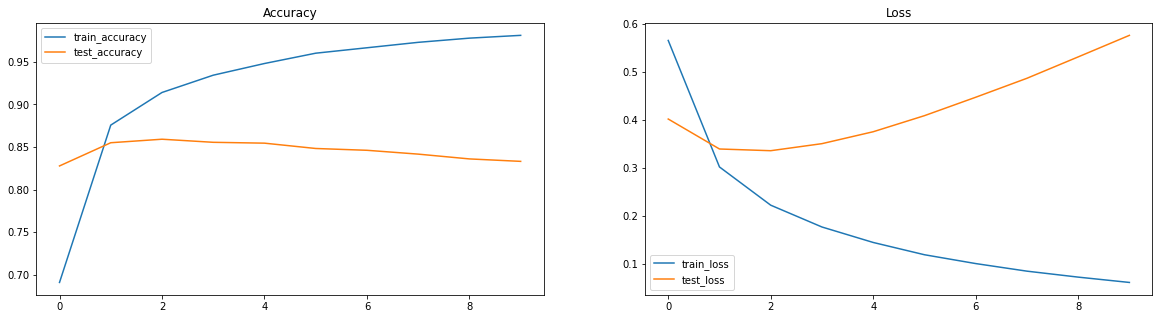

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Bidirectional Single Layer LSTM

In [0]:
model2=Sequential()

In [0]:
model2.add(Embedding(input_dim=10000,output_dim=32))
model2.add(Bidirectional(LSTM(64)))
model2.add(Dense(units=32,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

In [0]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 373,825
Trainable params: 373,825
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model2.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 7s 11ms/step - loss: 0.3997 - accuracy: 0.8108 - val_loss: 0.3274 - val_accuracy: 0.8574
Epoch 2/10
585/585 [==============================] - 6s 10ms/step - loss: 0.2028 - accuracy: 0.9206 - val_loss: 0.3406 - val_accuracy: 0.8617
Epoch 3/10
585/585 [==============================] - 6s 10ms/step - loss: 0.1127 - accuracy: 0.9586 - val_loss: 0.4090 - val_accuracy: 0.8509
Epoch 4/10
585/585 [==============================] - 6s 11ms/step - loss: 0.0653 - accuracy: 0.9773 - val_loss: 0.5165 - val_accuracy: 0.8465
Epoch 5/10
585/585 [==============================] - 6s 10ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.5907 - val_accuracy: 0.8426
Epoch 6/10
585/585 [==============================] - 6s 10ms/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.7742 - val_accuracy: 0.8416
Epoch 7/10
585/585 [==============================] - 6s 10ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.7559 - val_accuracy: 0.8376

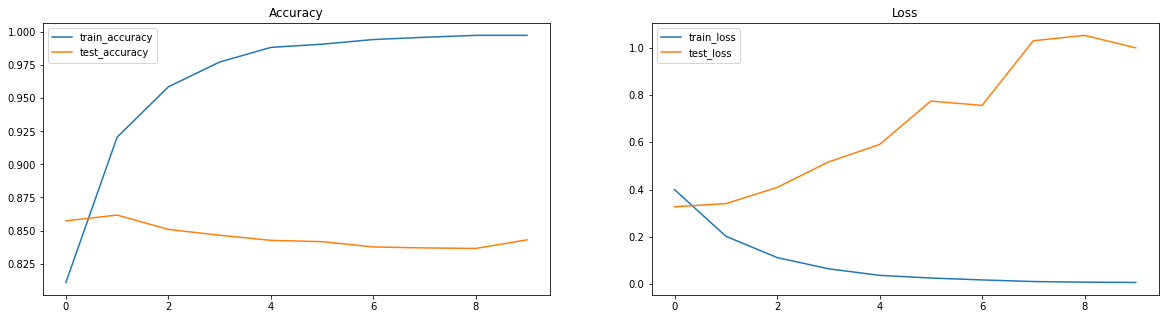

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Bidirectional Multilayer Layer LSTM

In [0]:
model3=Sequential()

In [0]:
model3.add(Embedding(input_dim=10000,output_dim=32))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(32)))
model3.add(Dense(units=64,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))

In [0]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 415,105
Trainable params: 415,105
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model3.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 10s 17ms/step - loss: 0.4000 - accuracy: 0.8067 - val_loss: 0.3302 - val_accuracy: 0.8545
Epoch 2/10
585/585 [==============================] - 9s 15ms/step - loss: 0.2057 - accuracy: 0.9156 - val_loss: 0.3310 - val_accuracy: 0.8574
Epoch 3/10
585/585 [==============================] - 9s 15ms/step - loss: 0.1170 - accuracy: 0.9590 - val_loss: 0.3897 - val_accuracy: 0.8516
Epoch 4/10
585/585 [==============================] - 9s 15ms/step - loss: 0.0685 - accuracy: 0.9759 - val_loss: 0.6007 - val_accuracy: 0.8464
Epoch 5/10
585/585 [==============================] - 9s 15ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.6244 - val_accuracy: 0.8421
Epoch 6/10
585/585 [==============================] - 9s 15ms/step - loss: 0.0275 - accuracy: 0.9902 - val_loss: 0.7394 - val_accuracy: 0.8423
Epoch 7/10
585/585 [==============================] - 9s 15ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.8030 - val_accuracy: 0.839

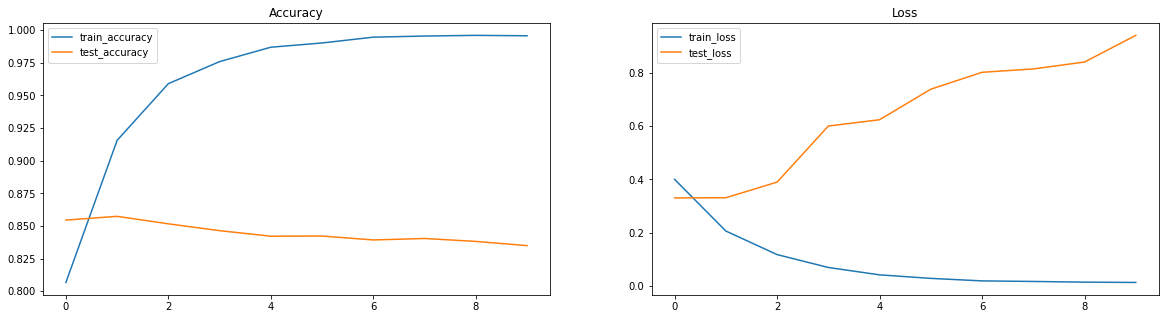

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

### Single Layer LSTM

In [0]:
model4=Sequential()

In [0]:
model4.add(Embedding(input_dim=10000,output_dim=32))
model4.add(LSTM(62))
model4.add(Dense(units=64,activation='relu'))
model4.add(Dense(units=1,activation='sigmoid'))

In [0]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 62)                23560     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4032      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 347,657
Trainable params: 347,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history=model4.fit(training_padded,y_train,epochs=10,validation_data=(test_padded,y_test))

Epoch 1/10
585/585 [==============================] - 5s 8ms/step - loss: 0.4432 - accuracy: 0.7796 - val_loss: 0.3436 - val_accuracy: 0.8475
Epoch 2/10
585/585 [==============================] - 5s 8ms/step - loss: 0.2412 - accuracy: 0.9050 - val_loss: 0.3932 - val_accuracy: 0.8540
Epoch 3/10
585/585 [==============================] - 5s 8ms/step - loss: 0.1737 - accuracy: 0.9354 - val_loss: 0.4367 - val_accuracy: 0.8348
Epoch 4/10
585/585 [==============================] - 5s 8ms/step - loss: 0.1347 - accuracy: 0.9526 - val_loss: 0.5091 - val_accuracy: 0.8419
Epoch 5/10
585/585 [==============================] - 5s 8ms/step - loss: 0.1060 - accuracy: 0.9637 - val_loss: 0.5750 - val_accuracy: 0.8339
Epoch 6/10
585/585 [==============================] - 5s 8ms/step - loss: 0.0853 - accuracy: 0.9708 - val_loss: 0.5556 - val_accuracy: 0.8329
Epoch 7/10
585/585 [==============================] - 5s 8ms/step - loss: 0.0712 - accuracy: 0.9765 - val_loss: 0.7209 - val_accuracy: 0.8298
Epoch 

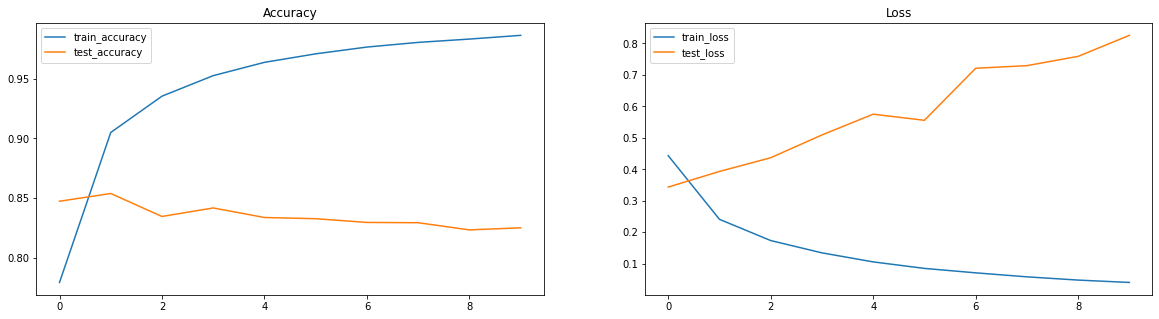

In [0]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.set_title('Loss')
ax2.legend()
plt.show()

#### *Bidirectional Single Layer LSTM has a good accuracy and also accuracy is constant and loss first increses and the decrease .So it if as good fit model.*

